In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_excel(r"E:\部门工作相关\感染性事件\普通患者\IcuNonOperation_BJ_BJ_JQYY_2020_05_19_12___\住院ICU科室名称\数据分析\院内院外感染\院内感染统计数据2.xlsx",head=0)

In [6]:
df[df.isnull().T.any()]

,RCASEID,入院天数,患者年龄,血糖测定值_平均值,血糖测定值_标准差,血糖测定值中位数,每日体温最高值_平均值,每日体温最高值_标准差,每日体温最高值,是否发热≥38℃,血白细胞_次数,血白细胞_平均值,血白细胞_标准差,抗菌药物升级次数,抗菌药物升级比例,未使用抗菌药物天数占比,呼吸机使用天数占比,导尿管使用天数占比,中心静脉插管使用天数占比,NIS感染
14,CIID1653090580922700383,9,53,4.56,NaN,4.56,36.90,0.766485,38.9,0.111111,2,7.750,4.836610,1,0.111111,0.777778,0.0,0.0,0.0,0
261,CIID1653104900652965771,16,66,4.88,NaN,4.88,36.90,0.774597,38.7,0.125000,5,6.776,1.706599,1,0.062500,0.625000,0.0,0.0,0.0,0
398,CIID1653111587951628238,10,32,4.51,NaN,4.51,37.34,0.485798,38.4,0.100000,2,10.655,2.595082,1,0.100000,0.800000,0.0,0.0,0.0,0


In [79]:
df2=df.dropna(how='any')

In [7]:
df_相关性=df.corr()

In [8]:
df_相关性.head(5)

,入院天数,患者年龄,血糖测定值_平均值,血糖测定值_标准差,血糖测定值中位数,每日体温最高值_平均值,每日体温最高值_标准差,每日体温最高值,是否发热≥38℃,血白细胞_次数,血白细胞_平均值,血白细胞_标准差,抗菌药物升级次数,抗菌药物升级比例,未使用抗菌药物天数占比,呼吸机使用天数占比,导尿管使用天数占比,中心静脉插管使用天数占比,NIS感染
入院天数,1.000000,0.245834,-0.110408,-0.036709,-0.128124,-0.274307,-0.273704,0.180590,-0.246525,0.786177,-0.130533,-0.068868,0.751049,-0.315221,0.306040,0.251367,0.116736,0.020133,0.358117
患者年龄,0.245834,1.000000,0.157093,0.134026,0.160524,-0.159679,-0.150474,-0.029958,-0.169261,0.254674,-0.011263,-0.078302,0.252216,0.007111,-0.064408,0.035918,0.168876,0.018101,0.201805
血糖测定值_平均值,-0.110408,0.157093,1.000000,0.741218,0.970538,0.210563,0.165774,0.018832,0.192803,-0.013491,0.158409,0.048817,-0.053840,0.163322,-0.152153,0.164280,0.294888,0.136242,0.006716
血糖测定值_标准差,-0.036709,0.134026,0.741218,1.000000,0.621490,0.085715,0.131538,0.072151,0.122412,0.046018,0.068124,0.061062,0.044102,0.099281,-0.081249,0.074626,0.118017,0.117735,0.086945
血糖测定值中位数,-0.128124,0.160524,0.970538,0.621490,1.000000,0.226009,0.173689,0.006018,0.194479,-0.028158,0.177021,0.051318,-0.077028,0.188431,-0.184640,0.177748,0.325160,0.134101,-0.010626


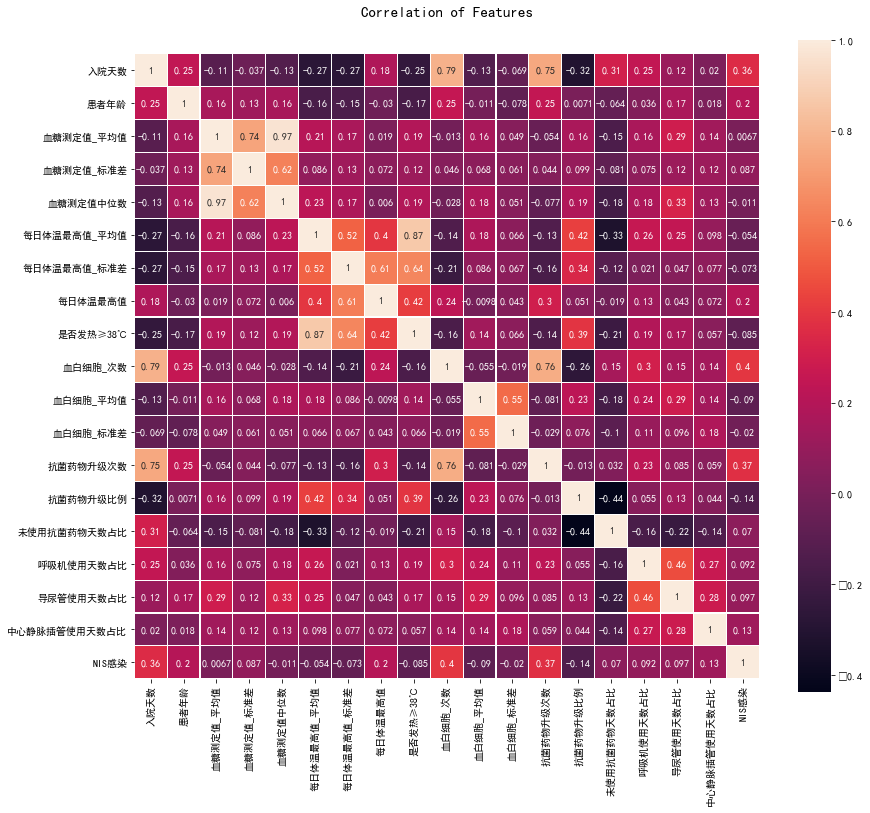

In [9]:
plt.figure(figsize=(14,12))
plt.title('Correlation of Features',y=1.05,size=15)
sns.heatmap(df_相关性,linewidths=0.1,vmax=1.0,
            square=True,linecolor='white',annot=True)
plt.xticks(rotation=90)    # 将字体进行旋转
plt.yticks(rotation=360)
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()

In [11]:
df.columns

Index(['RCASEID', '入院天数', '患者年龄', '血糖测定值_平均值', '血糖测定值_标准差', '血糖测定值中位数',
       '每日体温最高值_平均值', '每日体温最高值_标准差', '每日体温最高值', '是否发热≥38℃', '血白细胞_次数',
       '血白细胞_平均值', '血白细胞_标准差', '抗菌药物升级次数', '抗菌药物升级比例', '未使用抗菌药物天数占比',
       '呼吸机使用天数占比', '导尿管使用天数占比', '中心静脉插管使用天数占比', 'NIS感染'],
      dtype='object')

In [76]:
df3=df[['是否发热≥38℃','抗菌药物升级比例', '未使用抗菌药物天数占比']]

In [77]:
df3.head(3)

,是否发热≥38℃,抗菌药物升级比例,未使用抗菌药物天数占比
0,0.500000,0.222222,0.000000
1,0.100000,0.200000,0.000000
2,0.111111,0.111111,0.777778


In [78]:
from sklearn.preprocessing import StandardScaler
X = df3.values[:,0:]
X = np.nan_to_num(X)
print(X)
X.shape

[[0.5        0.22222222 0.        ]
 [0.1        0.2        0.        ]
 [0.11111111 0.11111111 0.77777778]
 ...
 [0.08333333 0.16666667 0.16666667]
 [0.36170213 0.10638298 0.12765957]
 [0.11111111 0.11111111 0.33333333]]


(414, 3)

In [79]:
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet
Clus_dataSet.shape

(414, 3)

In [85]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 1 2 0 3 2 1 0 1 2 0 1 1 1 2 3 2 0 0 0 0 1 2 1 1 1 2 0 3 0 1 0 0 0 0 1 1
 3 3 0 1 1 1 0 3 1 2 1 2 0 0 1 3 0 1 0 1 1 3 2 0 1 2 3 0 3 2 1 1 0 1 0 3 1
 2 2 0 1 1 1 0 1 1 0 2 0 1 1 1 1 1 0 1 1 0 2 1 0 1 0 2 1 2 1 1 2 1 0 2 1 1
 0 3 2 0 3 2 1 1 2 1 3 2 2 1 1 1 3 1 1 0 0 1 1 1 0 0 1 3 3 3 0 1 2 3 1 3 1
 0 1 0 1 1 3 2 2 1 1 3 2 2 2 0 2 3 1 2 1 1 0 3 1 3 1 2 1 0 1 1 0 1 1 1 2 2
 2 2 1 3 0 1 0 1 0 3 1 2 1 2 1 2 2 1 0 1 0 2 0 1 0 0 0 2 1 1 0 2 1 1 0 2 1
 0 2 1 3 2 1 1 1 2 0 2 0 1 1 2 1 0 1 3 1 3 1 0 1 0 3 1 1 0 2 1 3 3 2 3 0 2
 3 2 2 1 1 0 0 1 1 3 1 0 3 1 0 1 3 2 1 3 1 0 1 1 1 1 1 1 3 1 2 1 3 1 1 1 0
 0 1 0 3 3 0 1 1 2 1 0 1 0 0 2 2 1 1 2 1 1 0 1 2 1 3 3 3 1 1 3 2 1 2 1 2 1
 2 1 3 1 1 1 1 1 1 1 3 0 3 0 2 1 2 3 0 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 3 2 2
 3 0 1 3 1 1 1 0 1 1 2 3 3 3 0 0 0 1 0 2 2 3 3 1 1 3 2 1 2 1 1 1 1 0 1 0 1
 1 1 1 3 1 3 0]


In [86]:
df["标签"] = labels
df.head(5)

,RCASEID,入院天数,患者年龄,血糖测定值_平均值,血糖测定值_标准差,血糖测定值中位数,每日体温最高值_平均值,每日体温最高值_标准差,每日体温最高值,是否发热≥38℃,...,血白细胞_平均值,血白细胞_标准差,抗菌药物升级次数,抗菌药物升级比例,未使用抗菌药物天数占比,呼吸机使用天数占比,导尿管使用天数占比,中心静脉插管使用天数占比,NIS感染,标签
0,CIID1653089778641407901,18,44,10.443333,7.868966,6.55,37.922222,0.678715,39.6,0.500000,...,4.415000,1.912142,4,0.222222,0.000000,0.000000,0.000000,0.111111,0,3
1,CIID1653089847666026189,30,87,6.393750,1.250359,6.30,36.763333,0.716064,38.8,0.100000,...,5.812000,2.042822,6,0.200000,0.000000,0.466667,1.000000,0.933333,1,1
2,CIID1653089894634894934,9,66,13.720000,1.360404,13.34,36.900000,1.022252,39.6,0.111111,...,3.470000,1.600375,1,0.111111,0.777778,0.222222,0.222222,0.222222,0,2
3,CIID1653089975977137208,25,48,8.562000,1.536207,8.51,37.558333,0.357426,38.2,0.120000,...,14.805385,3.021756,2,0.080000,0.360000,0.720000,0.520000,0.880000,0,0
4,CIID1653089997964729133,90,24,8.040460,2.264963,7.74,38.370000,0.913623,40.2,0.733333,...,7.358023,4.973796,21,0.233333,0.022222,0.911111,0.300000,1.000000,1,3


In [87]:
df.groupby("标签").mean()

,入院天数,患者年龄,血糖测定值_平均值,血糖测定值_标准差,血糖测定值中位数,每日体温最高值_平均值,每日体温最高值_标准差,每日体温最高值,是否发热≥38℃,血白细胞_次数,血白细胞_平均值,血白细胞_标准差,抗菌药物升级次数,抗菌药物升级比例,未使用抗菌药物天数占比,呼吸机使用天数占比,导尿管使用天数占比,中心静脉插管使用天数占比,NIS感染
标签,,,,,,,,,,,,,,,,,,,
0,160.157303,66.977528,7.149278,1.891072,6.769382,37.081004,0.628489,38.920225,0.135530,51.134831,9.394333,3.372671,10.516854,0.096970,0.395018,0.160099,0.357336,0.630844,0.662921
1,74.880435,69.722826,7.312559,1.914344,7.014946,37.113301,0.611172,38.849076,0.116672,30.173913,9.703194,3.600503,8.842391,0.152046,0.060973,0.252273,0.461354,0.634105,0.538043
2,277.897436,65.589744,6.695649,1.749912,6.245449,36.888762,0.586589,38.992436,0.082073,49.897436,7.681250,2.803797,9.628205,0.060211,0.672266,0.162412,0.241960,0.510589,0.589744
3,44.301587,62.571429,8.709134,2.442934,8.403254,37.810894,0.905706,39.634921,0.439945,30.238095,10.162393,3.741993,7.492063,0.208016,0.110731,0.428490,0.570067,0.692576,0.492063


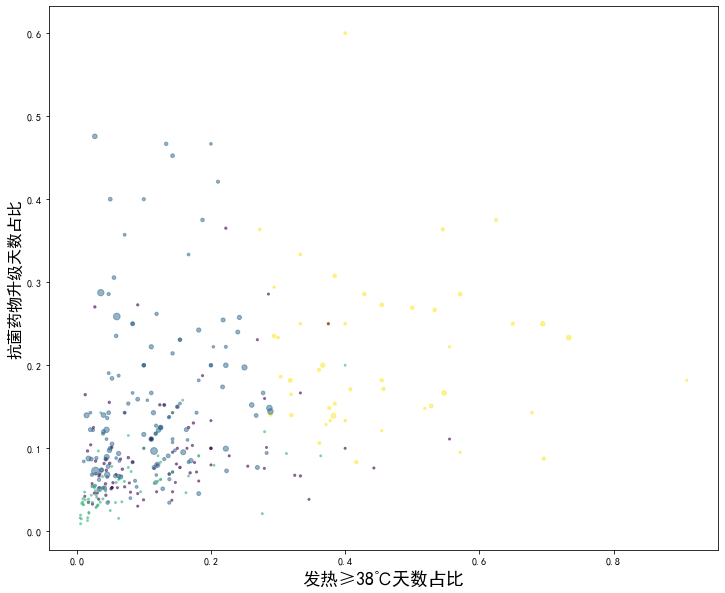

In [98]:
plt.figure(figsize=(12,10))
area = np.pi * ( X[:, 2])**-0.5
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('发热≥38℃天数占比', fontsize=18)
plt.ylabel('抗菌药物升级天数占比', fontsize=16)
plt.savefig(r'E:\部门工作相关\感染性事件\普通患者\IcuNonOperation_BJ_BJ_JQYY_2020_05_19_12___\住院ICU科室名称\数据分析\院内院外感染\相关性.jpg')
plt.show()

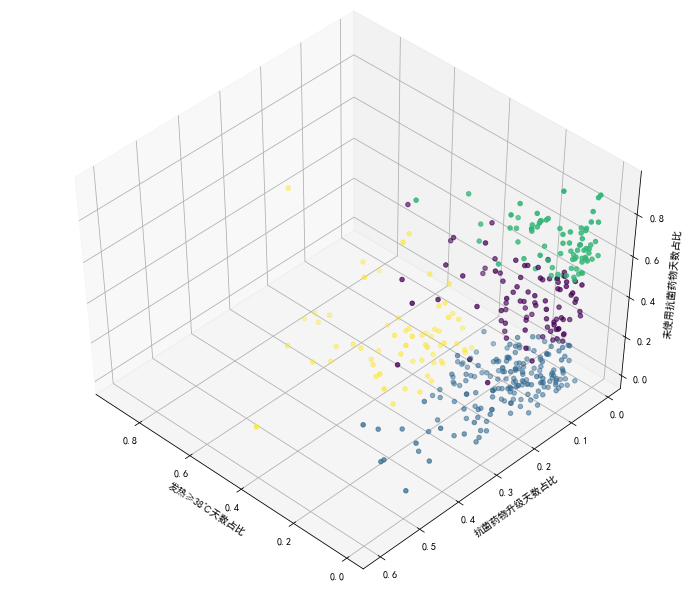

In [102]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('发热≥38℃天数占比')
ax.set_ylabel('抗菌药物升级天数占比')
ax.set_zlabel('未使用抗菌药物天数占比')

ax.scatter(X[:, 0], X[:,1], X[:, 2], c= labels.astype(np.float))

In [92]:
df.to_csv(r"E:\部门工作相关\感染性事件\普通患者\IcuNonOperation_BJ_BJ_JQYY_2020_05_19_12___\住院ICU科室名称\数据分析\患者分类_添加≥38℃分4类.csv")

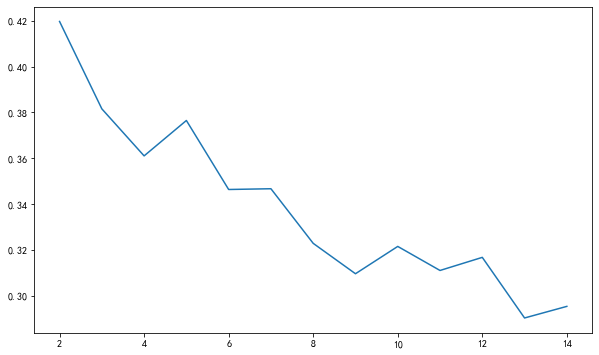

In [72]:
  ##评估训练模型
from sklearn.metrics import silhouette_score
silhouettteScore = []
for i in range(2,15):
  
    kmeans = KMeans(init = "k-means++",n_clusters = i,n_init = 12,random_state=123).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouettteScore.append(score)
plt.figure(figsize=(10,6))
plt.plot(range(2,15),silhouettteScore,linewidth=1.5, linestyle="-")
plt.show()

